In [156]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tnrange, tqdm_notebook
from DH_modules import box_model as bm
from DH_modules import var_box_model as vbm
from DH_modules import loop_box_model as lbm
from DH_modules import loop_var_box_model as lvbm
from DH_modules import DH_before
from DH_modules import rGEL
from DH_modules import GEL
from DH_modules import parameter_study as ps
from DH_modules import parameter_study_var as vps
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#plt.rcParams['font.weight']= 'heavy'
plt.rcParams.update({'font.size': 12})

## Single run of model with plots

In [20]:
#Define the boundary conditions that will be inputs in the model (in m GEL)
#initial water 
a=40
# water budget today
b=21
#outgassed
c=5

In [21]:
#Running ONE single model
# DF = dataframe where info is stored (see Box model for more info on what it contains)
# enrichment in units of (x VSMOW)
# H2O_loss is in grams per year
DF, enrichment, H2O_loss = vbm(a,b,c,0.32)
# note to get the total amount of water lost we can multiply by the total amount of water lost rGEL(H2O_loss*3.3e9)
# total time
tf = 3.3e9
#total number of steps of model
n = 100000

<IPython.core.display.Javascript object>


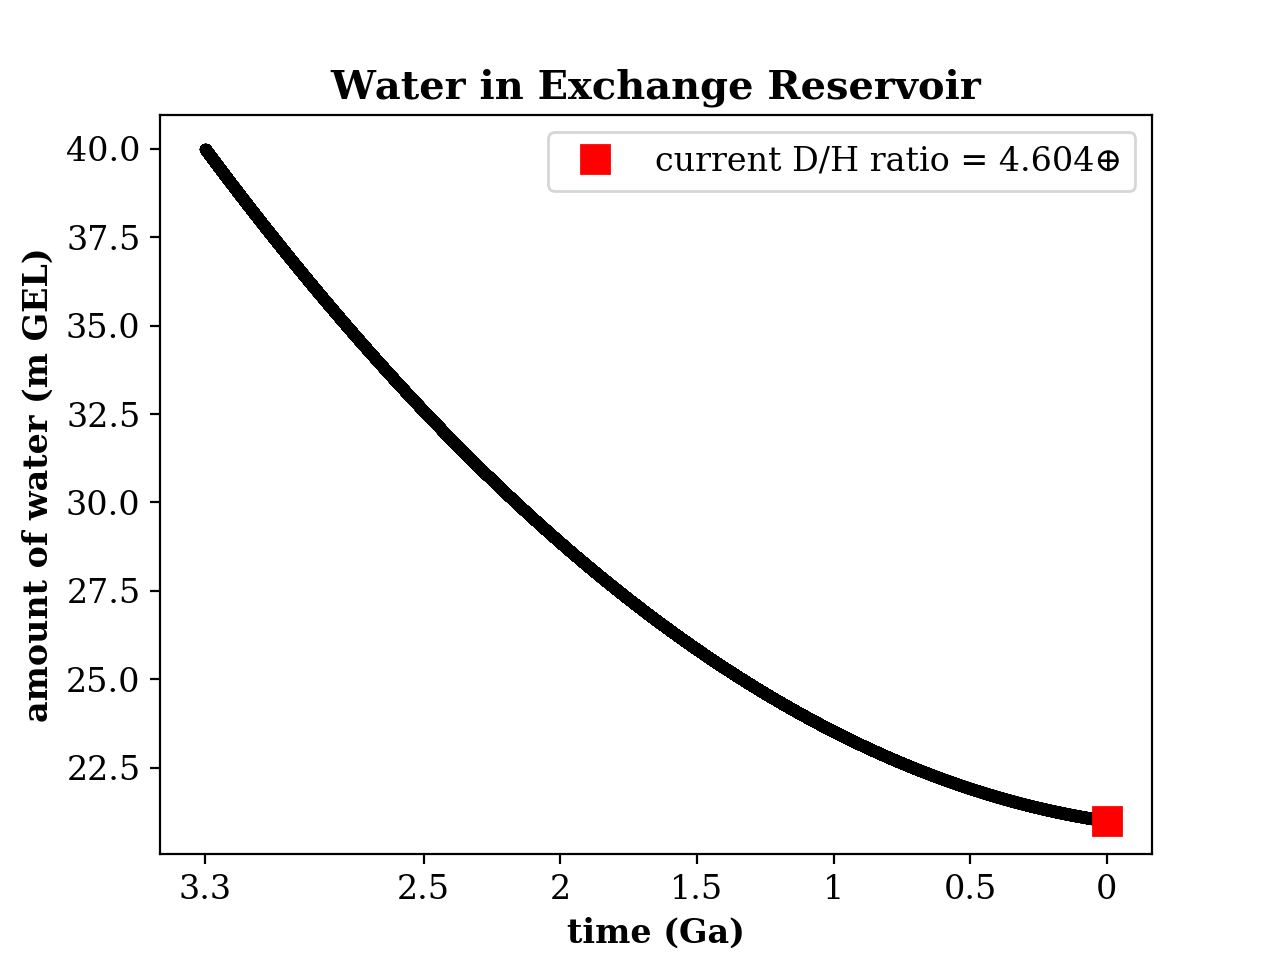

In [22]:
#Water budget as a function of time
#plotting routine
f = plt.figure()
ax = f.gca()
ax.plot(DF.t/1e9, rGEL(DF.Exch_Res), 'k.')
ax.set_ylabel('amount of water (m GEL)', fontweight='bold')
ax.set_xlabel('time (Ga)', fontweight='bold')
ax.set_title('Water in Exchange Reservoir', fontweight='bold')
ax.set_xticks([0,0.8,1.3,1.8,2.3,2.8,3.3])
labels = [3.3,2.5,2,1.5,1,0.5,0]
ax.set_xticklabels(labels)
endpt = ax.plot(DF.t[n]/1e9,rGEL(DF.Exch_Res[n]),'s',markersize=10, color="red")
ax.legend(endpt,["current D/H ratio = " + str(round(DF.DH[n]/DH_before,3))+'⊕'],numpoints=1,loc=1)
#plt.savefig('mars_conf_plot_a', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


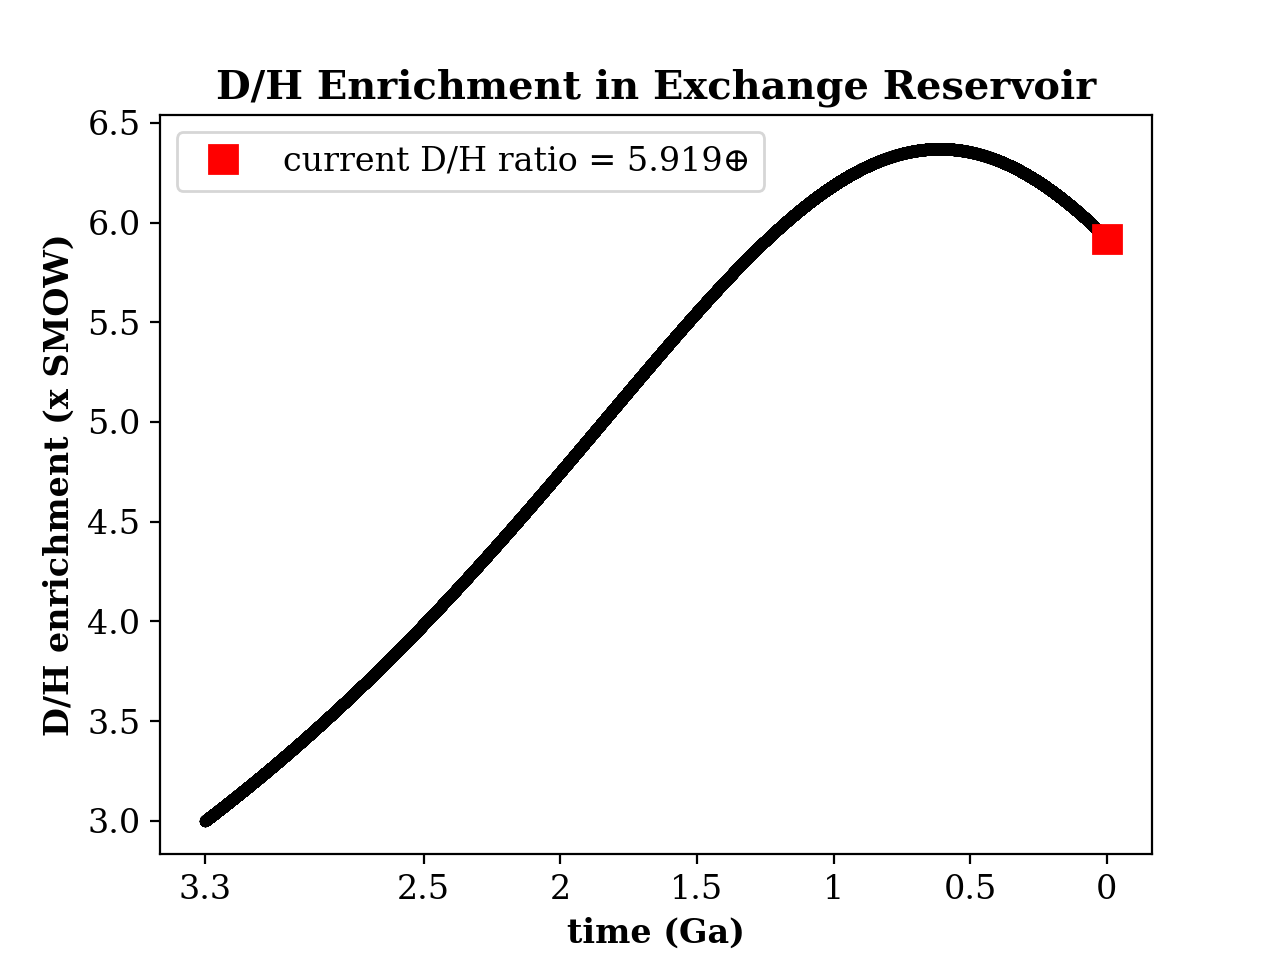

In [10]:
#D/H enrichment as a function of time
#plotting routine
f = plt.figure()
ax = f.gca()
ax.plot(DF.t/1e9, DF.DH/DH_before, 'k.')
ax.set_ylabel('D/H enrichment (x SMOW)', fontweight='bold')
ax.set_xlabel('time (Ga)', fontweight='bold')
ax.set_title('D/H Enrichment in Exchange Reservoir', fontweight='bold')
ax.set_xticks([0,0.8,1.3,1.8,2.3,2.8,3.3])
labels = [3.3,2.5,2,1.5,1,0.5,0]
ax.set_xticklabels(labels)
endpt = ax.plot(tf/1e9,DF.DH[n]/DH_before,'s',markersize=10, color="red")
ax.legend(endpt,["current D/H ratio = " + str(round(DF.DH[n]/DH_before,3))+ "⊕"],numpoints=1,loc=2)
#plt.savefig('mars_conf_plot_b', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


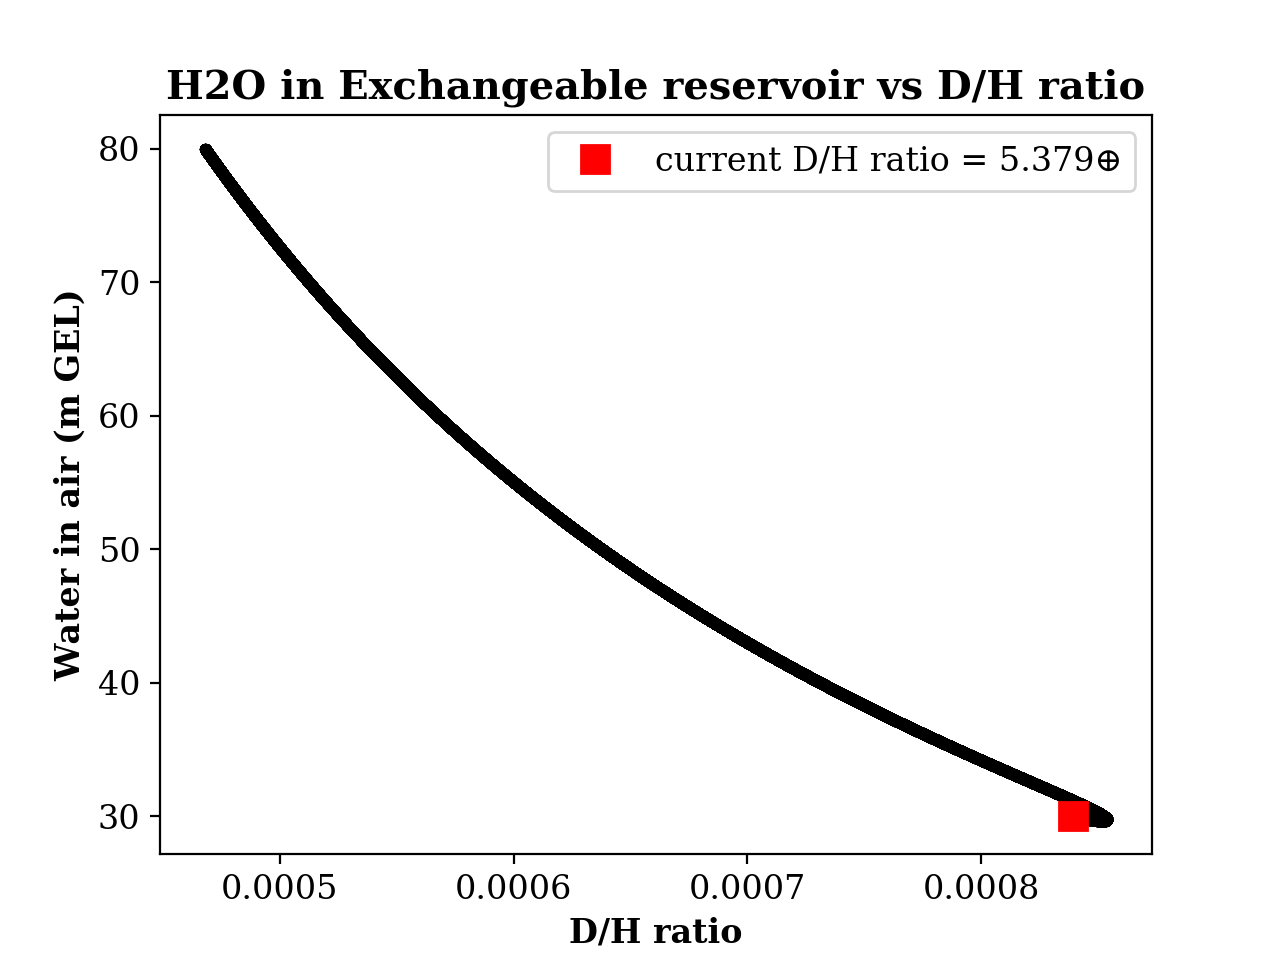

In [6]:
#plotting amount of water vs D/H ratio 
# total time
tf = 3e9
#total number of steps of model
n = 100000

#plotting routine
f = plt.figure()
ax = f.gca()
ax.plot(DF.DH, rGEL(DF.Exch_Res), 'k.')
ax.set_ylabel('Water in air (m GEL)', fontweight='bold')
ax.set_xlabel('D/H ratio', fontweight='bold')
ax.set_title('H2O in Exchangeable reservoir vs D/H ratio', fontweight='bold')
ax.xaxis.set_ticks(np.arange(0.0001, 0.0009, 0.0001))
labels = np.round(np.arange(0.0001, 0.0009, 0.0001),4)
ax.set_xticklabels(labels)
endpt = ax.plot(DF.DH[n],rGEL(DF.Exch_Res[n]),'s',markersize=10, color="red")
ax.legend(endpt,["current D/H ratio = " + str(round(DF.DH[n]/DH_before,3))+'⊕'],numpoints=1,loc=1)
#plt.savefig('DH_water_enrichmentW.png', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


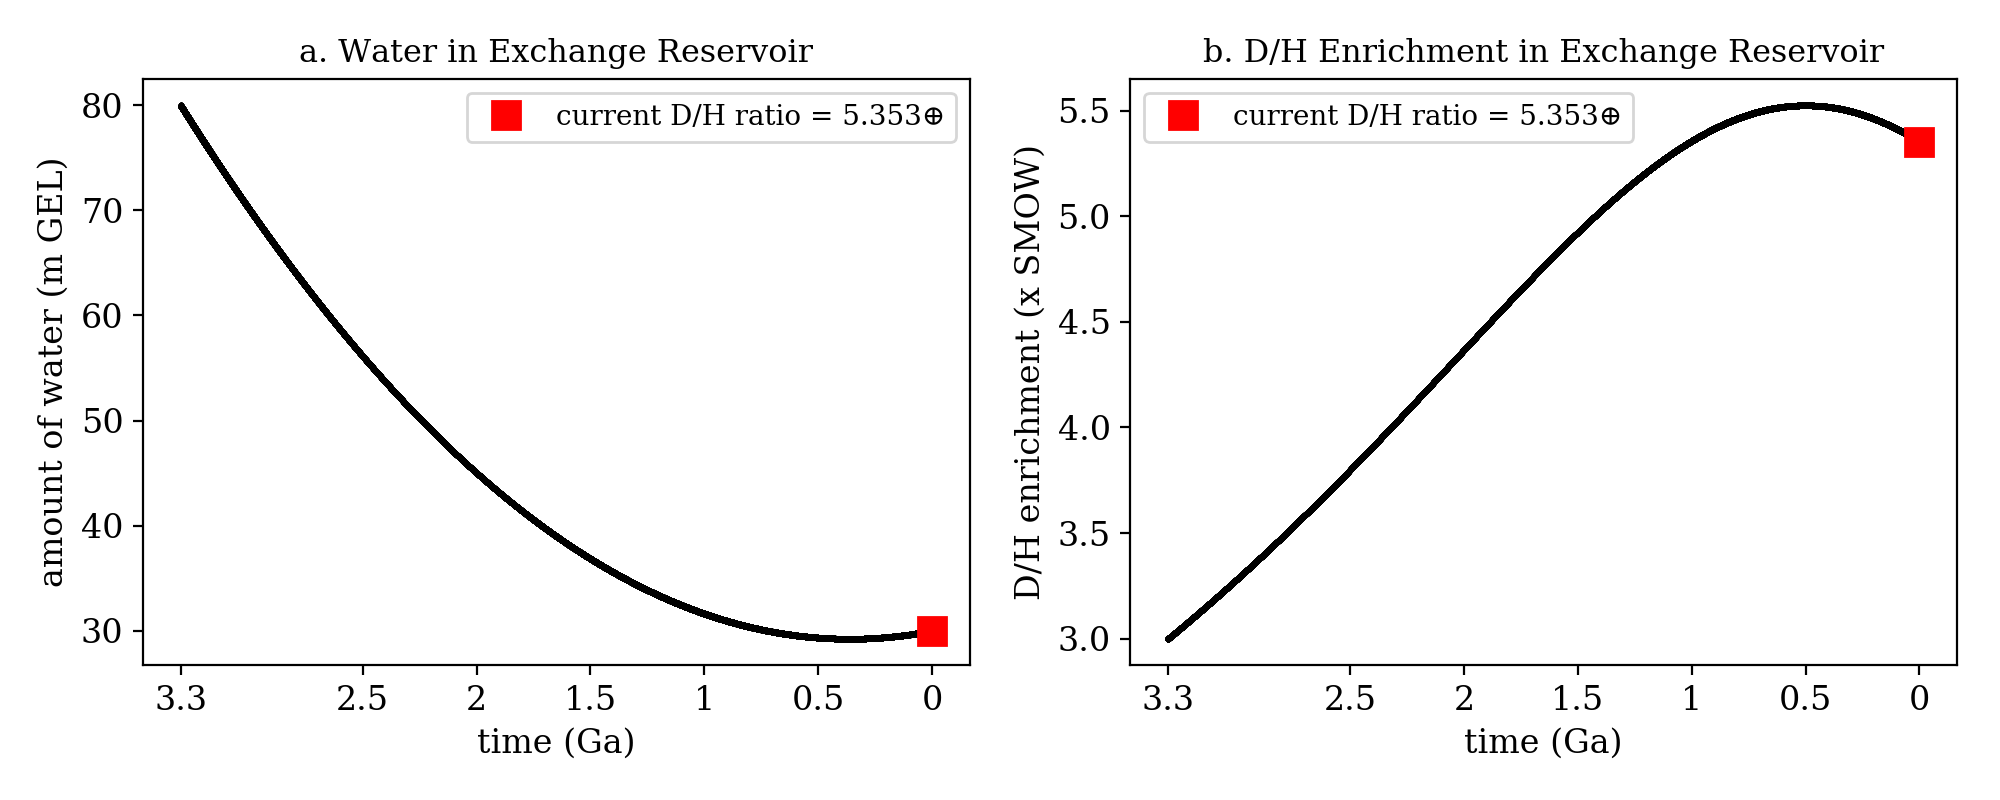

In [6]:
#creating subplot for paper

fig,ax = plt.subplots(1,2,figsize=(10,4))
fig.subplots_adjust(hspace=.3)
n = 100000

sc1 = ax[0].plot(DF.t/1e9, rGEL(DF.Exch_Res), 'k.',markersize=2)
ax[0].set_title('a. Water in Exchange Reservoir',fontsize=11.5)
ax[0].set_xlabel('time (Ga)')
ax[0].set_ylabel('amount of water (m GEL)')
ax[0].set_xticks([0,0.8,1.3,1.8,2.3,2.8,3.3])
labels = [3.3,2.5,2,1.5,1,0.5,0]
ax[0].set_xticklabels(labels)
endpt1 = ax[0].plot(DF.t[n]/1e9,rGEL(DF.Exch_Res[n]),'s',markersize=10, color="red")
ax[0].legend(endpt1,["current D/H ratio = " + str(round(DF.DH[n]/DH_before,3))+'⊕'],numpoints=1,loc=1,fontsize=10)


sc2 = ax[1].plot(DF.t/1e9, DF.DH/DH_before, 'k.',markersize=2)
ax[1].set_title('b. D/H Enrichment in Exchange Reservoir',fontsize=11.5)
ax[1].set_xlabel('time (Ga)')
ax[1].set_ylabel('D/H enrichment (x SMOW)')
ax[1].set_xticks([0,0.8,1.3,1.8,2.3,2.8,3.3])
ax[1].set_xticklabels(labels)
endpt2 = ax[1].plot(tf/1e9,DF.DH[n]/DH_before,'s',markersize=10, color="red")
ax[1].legend(endpt2,["current D/H ratio = " + str(round(DF.DH[n]/DH_before,3))+ "⊕"],numpoints=1,loc=2,fontsize=10)
plt.tight_layout()
#plt.savefig('Varying_DH_water_time.jpg', dpi=300)

plt.show()

## Parameter study 

In [28]:
#Run the parameter study
#ps : parameter study with constant rates of escape and outgassing
#vps: parameter study with monotonically decreasing escape and outgassing rates
Df = vps(1,100,20,50,5,100,0,'var_R0_results_average_MVN.csv')

<IPython.core.display.Javascript object>


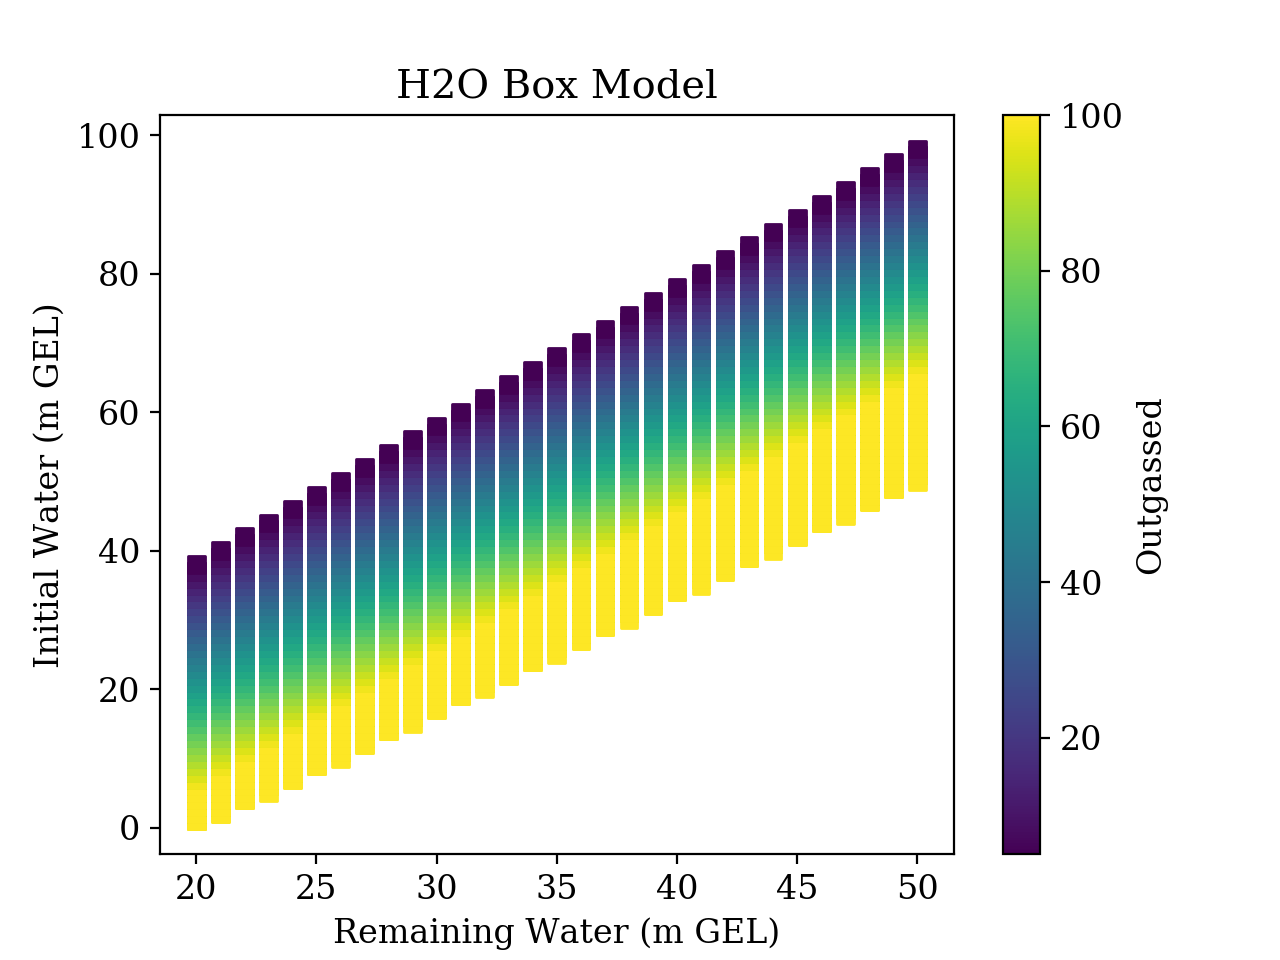

Text(0.5,1,'H2O Box Model')

In [29]:
#plotting results of the prameter study
#this plot is 3D so there is hidden info
sc = plt.scatter(Df.Remainder, Df.Initial,  c=Df.Outgassed,marker='s')
cb = plt.colorbar(sc)
cb.set_label('Outgassed')
plt.xlabel('Remaining Water (m GEL)')
plt.ylabel('Initial Water (m GEL)')
plt.title('H2O Box Model')

## Uploading previous runs of the parameter study and plotting the results

In [117]:
#Readin in the CSV files 
#Df = pd.read_csv('R32_results_20-160.csv')
#Df_FF = pd.read_csv('R0_results_0-100.csv')
Df = pd.read_csv('var_R32_results_average_MVN.csv')
Df_FF = pd.read_csv('var_R0_results_average_MVN.csv')

In [118]:
Df = Df.drop(Df[Df.Remainder < 20].index)
Df_FF = Df_FF.drop(Df_FF[Df_FF.Remainder < 20].index)
Df = Df.drop_duplicates(keep='first', inplace=False)
Df_FF = Df_FF.drop_duplicates(keep='first', inplace=False)

In [119]:
#only necessary for variable escape rates dataframes

#converting the escape rates at 3.3 Ga to floats
Df['Escape'] = pd.to_numeric(Df['Escape'].str[1:15])
Df_FF['Escape'] = pd.to_numeric(Df_FF['Escape'].str[1:15])

#Adding a column for total water loss
Df['Loss'] = Df.Initial-Df.Remainder+Df.Outgassed
Df_FF['Loss'] = Df_FF.Initial-Df_FF.Remainder+Df_FF.Outgassed

In [187]:
#reducing data to remove overlapping points and show only the minimum and maximum outgassing of the overlapping points
#all points in between minimum and maximum outgassing are also succesful runs
#then, add the minimums and maximums so that we display the sum of min + max outgassing
#when sum = 105 m (minimum possible to maximum possible outgassing, then all outgassing rates are valid)
#when sum > 105 m (the minimum outgassing rate is higher than 5m GEL so its a narrower range of successful runs)
#when sum < 105 m (the maximum outgassing rate is lower than 100m GEL so its a narrower range of successful runs)
minmax = Df.groupby(['Initial', 'Remainder']).Outgassed.min().reset_index(name='Min')
maxs = Df.groupby(['Initial', 'Remainder']).Outgassed.max().reset_index(name='Max')
minmax['Max'] = maxs.Max
minmax['Sum']= minmax.Min+minmax.Max
##
##
FFminmax = Df_FF.groupby(['Initial', 'Remainder']).Outgassed.min().reset_index(name='Min')
FFmaxs = Df_FF.groupby(['Initial', 'Remainder']).Outgassed.max().reset_index(name='Max')
FFminmax['Max'] = FFmaxs.Max
FFminmax['Sum']= FFminmax.Min+FFminmax.Max

<IPython.core.display.Javascript object>


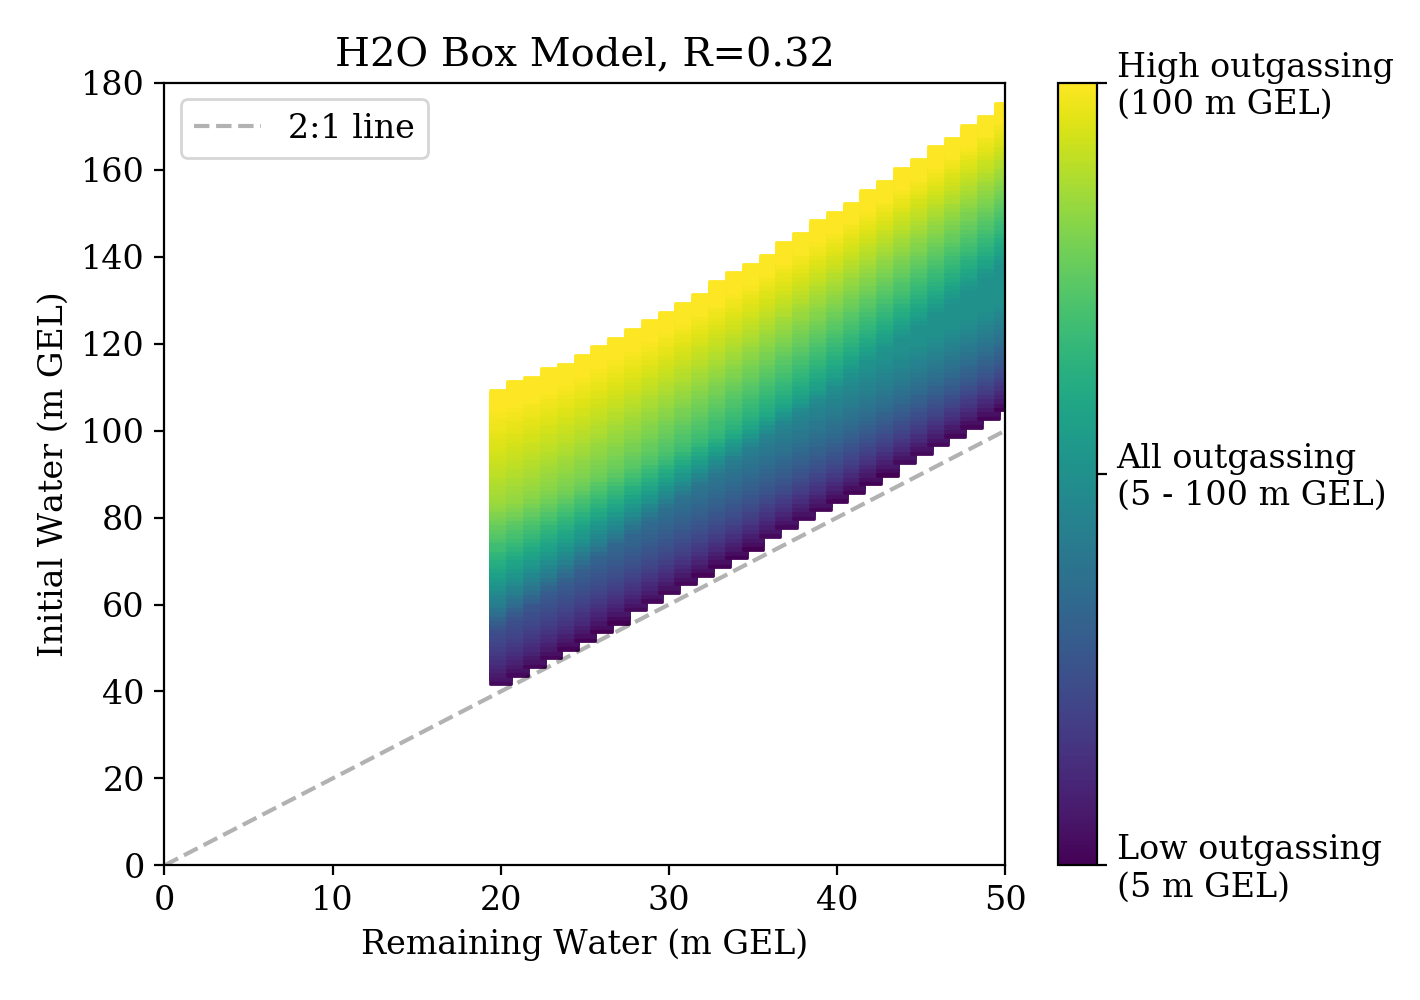

In [35]:
#plotting the successful runs without overlap
plt.figure(figsize=(7.1,5))
sc = plt.scatter(minmax.Remainder, minmax.Initial,  c=(minmax.Sum),marker='s', s = 55)
cb = plt.colorbar(sc)
cb.set_ticks([minmax.Sum.min(),105,minmax.Sum.max()])
cb.set_ticklabels(['Low outgassing'+'\n'+'(5 m GEL)', 'All outgassing'+'\n'+'(5 - 100 m GEL)', 'High outgassing'+'\n'+'(100 m GEL)'])
plt.xlabel('Remaining Water (m GEL)')
plt.ylabel('Initial Water (m GEL)')
plt.title('H2O Box Model, R=0.32')

#plot y=2x line
x= np.linspace(0,50)
y = 2*x
line1 = plt.plot(x,y,'k',linestyle='dashed',alpha=0.3)
plt.legend(line1, ["2:1 line"], fancybox=True)

#axes limits
plt.ylim(0,180)
plt.xlim(0,50)
plt.tight_layout()
#plt.savefig('R32_parameter_study_results_average_maven.jpg', transparent=True, dpi=300)
plt.show()

<IPython.core.display.Javascript object>


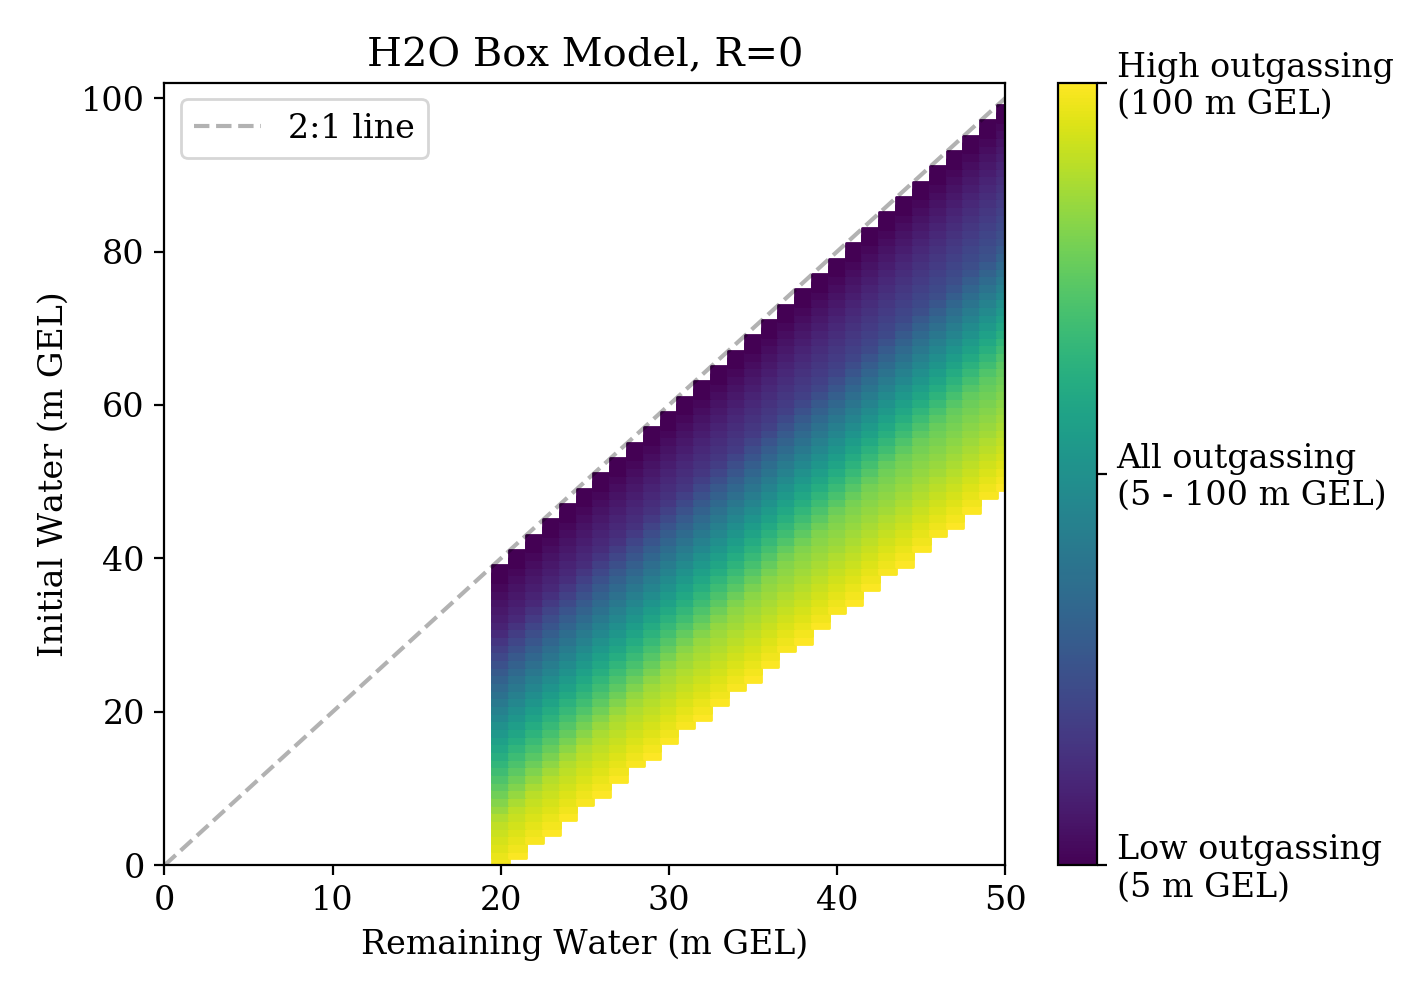

In [36]:
#plotting the successful runs without overlap
plt.figure(figsize=(7.1,5))
sc = plt.scatter(FFminmax.Remainder, FFminmax.Initial,  c=(FFminmax.Sum),marker='s')
cb = plt.colorbar(sc)
cb.set_ticks([FFminmax.Sum.min(),105,FFminmax.Sum.max()])
cb.set_ticklabels(['Low outgassing'+'\n'+'(5 m GEL)', 'All outgassing'+'\n'+'(5 - 100 m GEL)', 'High outgassing'+'\n'+'(100 m GEL)'])
plt.xlabel('Remaining Water (m GEL)')
plt.ylabel('Initial Water (m GEL)')
plt.title('H2O Box Model, R=0')

#plotting the y=2x line
x= np.linspace(0,50)
y = 2*x
line1 = plt.plot(x,y,'k',linestyle='dashed',alpha=0.3, label = ('2:1 line'))
plt.legend(line1, ["2:1 line"], fancybox=True)

#axes limits
plt.ylim(0,102)
plt.xlim(0,50)
plt.tight_layout()
#plt.savefig('R0_parameter_study_results_average_maven.jpg', transparent=True, dpi=300)
plt.show()

In [216]:
MAVEN_escape_average =  8700*3.154e+7
MAVEN_escape_max = 16000*3.154e+7
Df.Escape.max()/MAVEN_escape_max

38.23625039632213

## Plot of water loss vs fractionation factor

In [11]:
## Create array of fractionation factors to from 3.2e-5 to 0.32
R_array =  np.linspace(3.2e-5,0.32)

In [72]:
def find_init(a,b,R,X,V,e):
    '''Loops through different values for initial water and outputs the amount of initial water needed for given enrichment
    given constant outgassing and remining water
    Input: 
    a: beginning value for range of initial water
    b: end value for range of initial water
    X: Remaining (current) water budget m GEL
    V: total amount of water outgassed in the past tf  years
    e: current day enrichment we want to achieve
    Output:
    init[locmin]: initial water needed to recreate enrichment
    DH_init[locmin]: the corresponding enrichment (should be equal or close to the input e)
    DH_loss[locmin]: the corresponding water loss'''
    nn = b-a
    init = np.linspace(a, b, nn+1)
    DH_init = np.zeros_like(init)
    DH_loss = np.zeros_like(init)
    check = True
    mult = 1
    while check == True:
        for i in range(nn+1):
            DH_init[i] = lvbm(init[i],X,V,R)[0]
            DH_loss[i] = lvbm(init[i],X,V,R)[1][0]
        if abs(DH_init - e).min() >= 0.001:
            locmin =  abs(DH_init - e).argmin()
            mult = 0.1*mult
            init = np.linspace(init[locmin]+(init[locmin]*mult), init[locmin]-(init[locmin]*mult), nn+1)
            check == True
        else:
            locmin =  abs(DH_init - e).argmin()
            check == False
            break
    return init[locmin], DH_init[locmin], DH_loss[locmin]

In [85]:
#test run for one fractionation factor
init, DH_init, DH_loss = find_init(10,120,0.00032,30,50,5)

In [26]:
def Rem(a,b,R,I,V,e):
    '''Loops through different values for remaining water and outputs the amount of current water needed for given enrichment
    Input: 
    a: beginning value for range 
    b: end value for range 
    I: Initial water budget m GEL
    V: total amount of water outgassed in the past tf  years
    e: current day enrichment we want to achieve
    Output:
    rem[locmin]: remaining water needed to recreate enrichment
    DH_rem[locmin]: the corresponding enrichment (should be equal or close to the input e)
    DH_loss[locmin]: the corresponding water loss'''
    nn = b-a
    rem = np.linspace(a, b, nn+1)
    DH_rem = np.zeros_like(rem)
    DH_loss = np.zeros_like(rem)
    check = True
    mult = 1
    while check == True:
        for i in range(nn+1):
            DH_rem[i],DH_loss[i] = lbm(I,rem[i],V,R)

        if abs(DH_rem - e).min() >= 0.001:
            locmin =  abs(DH_rem - e).argmin()
            mult = 0.1*mult
            rem = np.linspace(rem[locmin]+(rem[locmin]*mult), rem[locmin]-(rem[locmin]*mult), nn+1)
            check == True
        else:
            locmin =  abs(DH_rem - e).argmin()
            check == False
            break
    return rem[locmin], DH_rem[locmin], DH_loss[locmin]

In [55]:
#test run for one fractionation factor
rem, DH_rem, DH_loss = Rem(20,50,0.00032,80,30,5)

In [96]:
#Varying initial water reservoir
#Running models with different fractionation factors, all other variables kept constant
# DF = dataframe where info is stored (see Box model for more info on what it contains)
# enrichment in units of (x VSMOW)
# H2O_loss is in grams per year
# total time
tf = 3.3e9
#total number of steps of model
n = 10000
## Create array of fractionation factors to from 3.2e-5 to 0.32
R_array =  np.logspace(-6.49,-0.495)
N = R_array.size
R_init = np.zeros(N)
R_enrichment = np.zeros(N)
R_H2O_loss = np.zeros(N)
#outgassed total
V = 50
#remaining total
X = 30
#creating dataframe
for i in tnrange(0,N): 
    R_init[i], R_enrichment[i], R_H2O_loss[i] = find_init(10,125,R_array[i],X,V,6)

R_DF = pd.DataFrame(R_array)
R_DF.columns = ['FF']
R_DF['enrichment'] = R_enrichment
#to get the total amount of water lost we do: R_init + V - X
R_DF['loss'] = R_init - X + V
#past loss is showing the loss rate 3.3 Ga ago
R_DF['past_loss'] = R_H2O_loss
R_DF.to_csv('V_init_FF_vs_loss_enrichment6_30X_50V.csv')

In [147]:
#read in previously save dataframe
R_DF6 = pd.read_csv('V_init_FF_vs_loss_enrichment6_30X_50V.csv')
R_DF5 = pd.read_csv('V_init_FF_vs_loss_enrichment5_30X_50V.csv')

<IPython.core.display.Javascript object>


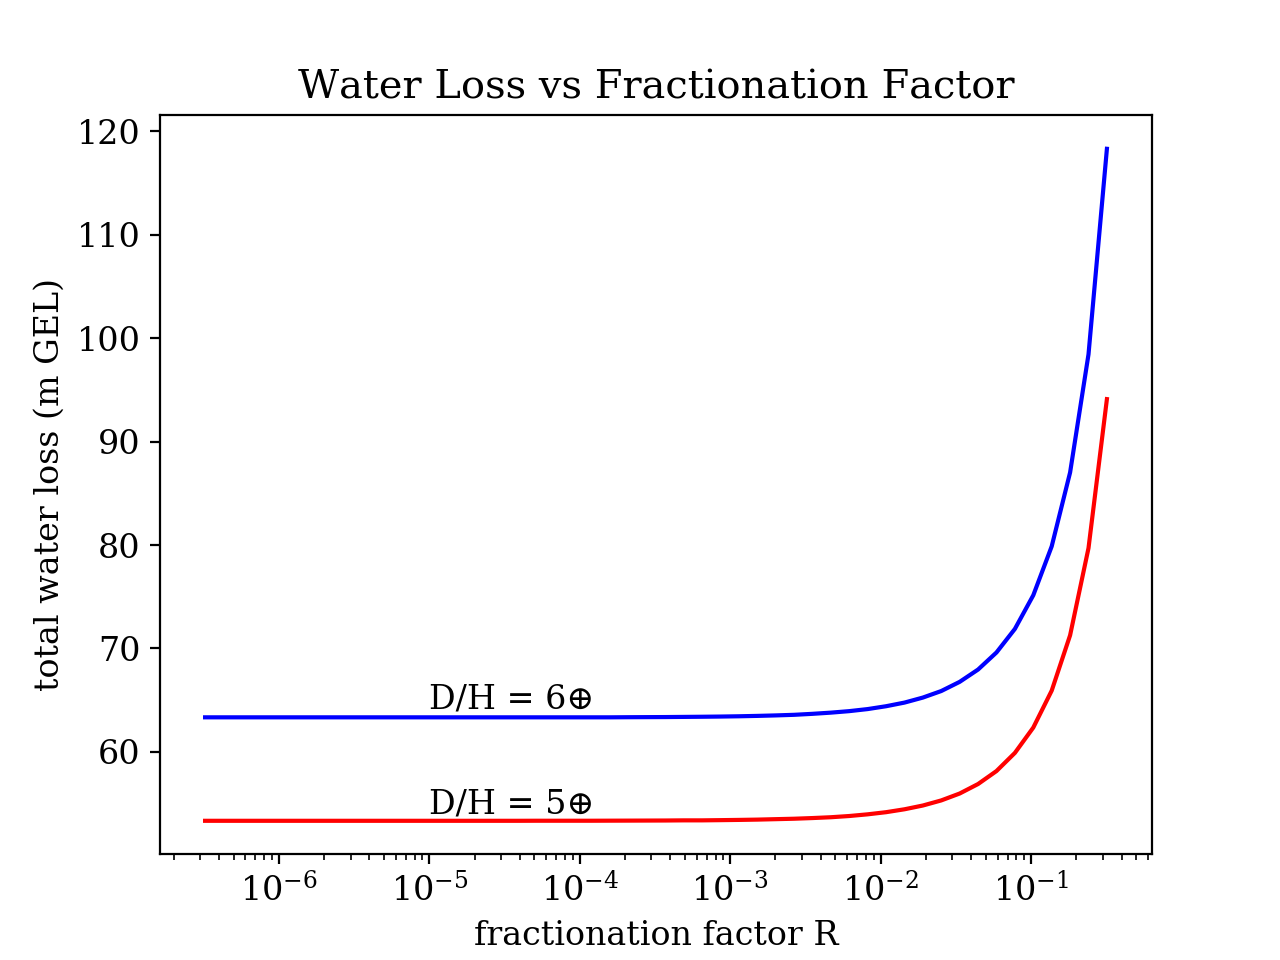

In [123]:
#plotting routine
plt.plot(R_DF6.FF,R_DF6.loss,'b')
plt.plot(R_DF5.FF,R_DF5.loss,'r')
plt.xscale('log')
plt.ylabel('total water loss (m GEL)')
plt.annotate('D/H = 5⊕', xy=(1e-5, 54))
plt.annotate('D/H = 6⊕', xy=(1e-5, 64.2))
plt.xlabel('fractionation factor R')
plt.title('Water Loss vs Fractionation Factor')
#plt.tight_layout()
#plt.ylim(54,84)
plt.show()
#plt.savefig('Varying_Waterloss_ff_enrichment_revised_paper', dpi=300)